# Dataset Analysis

<Axes: title={'center': 'ESTR'}, xlabel='date'>

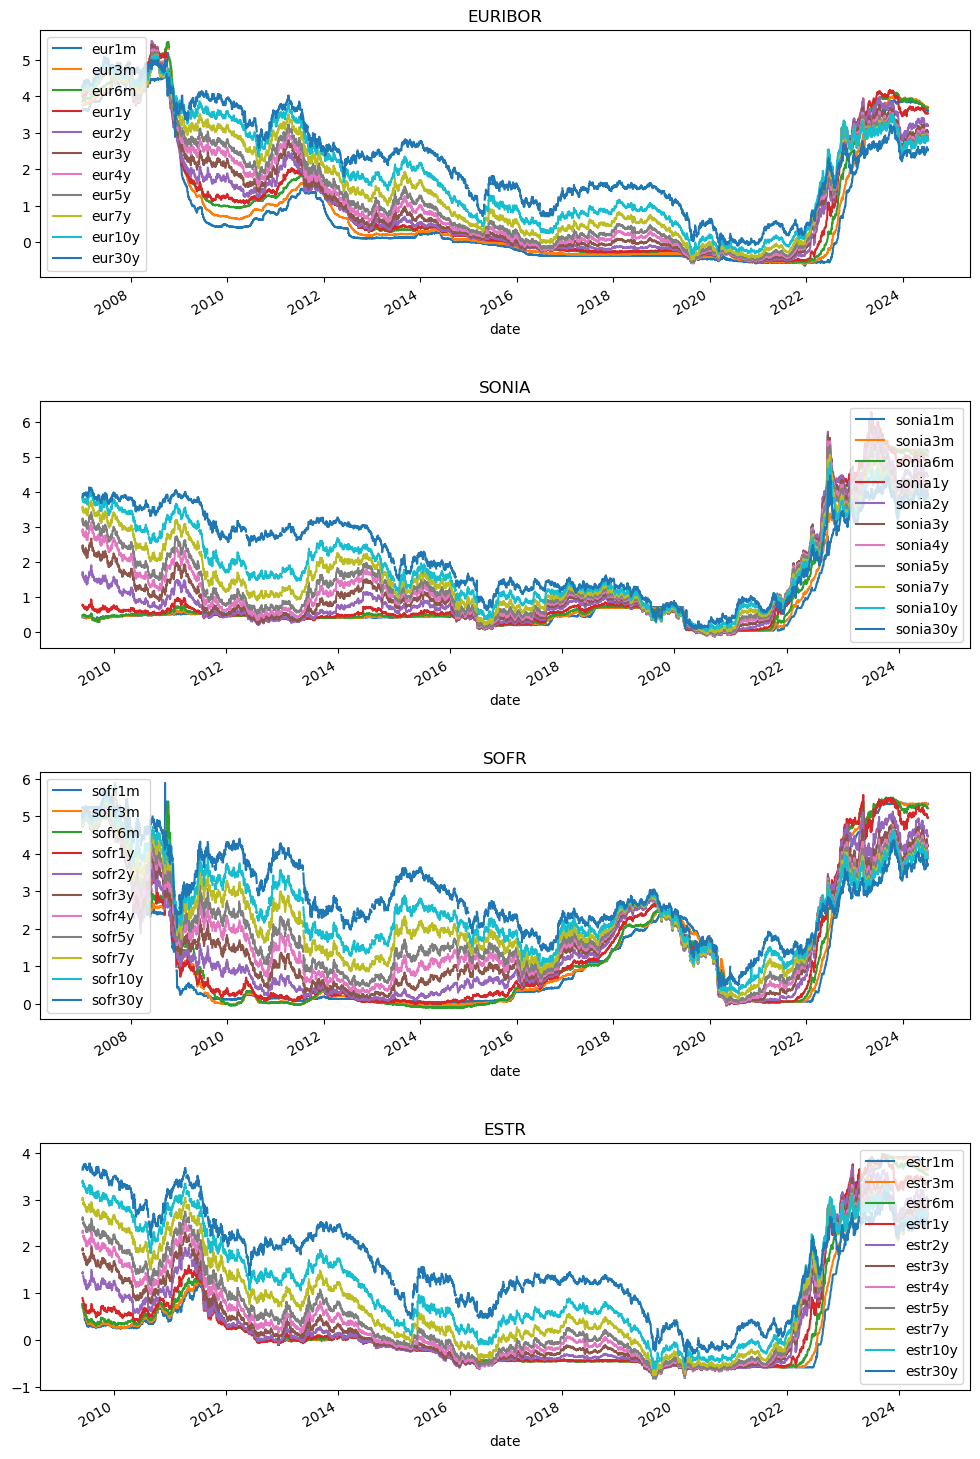

In [1]:
import numpy as np
import pandas as pd
import math, os, time, tqdm
import datetime as dt
import matplotlib.pyplot as plt

market_quotes = pd.read_csv('rates_20240710.csv')
market_quotes['date'] = pd.to_datetime(market_quotes['date'], format = '%Y-%m-%d')
#market_quotes.drop(index=market_quotes.index[:4301], axis=0, inplace=True) #Drop all dates with Nan-values, starting at 2020-11-02
#market_quotes = market_quotes.reset_index(drop=True) 

market_quotes.set_index('date', inplace = True)

sonia_tenors = ['sonia1m', 'sonia3m', 'sonia6m', 'sonia1y', 'sonia2y', 'sonia3y', 'sonia4y', 'sonia5y', 'sonia7y', 'sonia10y', 'sonia30y']
estr_tenors = ['estr1m', 'estr3m', 'estr6m', 'estr1y', 'estr2y', 'estr3y', 'estr4y', 'estr5y', 'estr7y', 'estr10y', 'estr30y']
sofr_tenors = ['sofr1m', 'sofr3m', 'sofr6m', 'sofr1y', 'sofr2y', 'sofr3y', 'sofr4y', 'sofr5y', 'sofr7y', 'sofr10y', 'sofr30y']
euribor_tenors = ['eur1m', 'eur3m', 'eur6m', 'eur1y', 'eur2y', 'eur3y', 'eur4y', 'eur5y', 'eur7y', 'eur10y', 'eur30y']

sonia = market_quotes[sonia_tenors]
estr = market_quotes[estr_tenors]
sofr = market_quotes[sofr_tenors]
euribor = market_quotes[euribor_tenors]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize = [12, 20])

plt.subplots_adjust(hspace = 0.5)

euribor.plot(ax=axes[0], title = 'EURIBOR', rot = 30)
sonia.plot(ax=axes[1], title = 'SONIA')
sofr.plot(ax=axes[2], title = 'SOFR')
estr.plot(ax=axes[3], title = 'ESTR')

Observing values past 2020-11-02, for which there are rates for all intruments. 

In [2]:
market_quotes = pd.read_csv('rates_20240710.csv')
market_quotes['date'] = pd.to_datetime(market_quotes['date'], format = '%Y-%m-%d')

#Drop all dates with Nan-values, starting at 2020-11-02
market_quotes.drop(index=market_quotes.index[:4301], axis=0, inplace=True) 
#market_quotes = market_quotes.reset_index(drop=True) 


market_quotes.set_index('date', inplace = True)


market_quotes.head()

,sonia1m,sonia3m,sonia6m,sonia1y,sonia2y,sonia3y,sonia4y,sonia5y,sonia7y,sonia10y,...,eur3m,eur6m,eur1y,eur2y,eur3y,eur4y,eur5y,eur7y,eur10y,eur30y
date,,,,,,,,,,,,,,,,,,,,,
2020-11-02,0.052,0.045,0.022,-0.017,-0.055,-0.058,-0.040,-0.013,0.057,0.166,...,-0.520,-0.513,-0.5290,-0.54400,-0.53925,-0.51890,-0.48900,-0.40990,-0.27070,-0.04230
2020-11-03,0.051,0.046,0.024,-0.014,-0.045,-0.043,-0.018,0.018,0.099,0.218,...,-0.520,-0.513,-0.5275,-0.53925,-0.53300,-0.50875,-0.47640,-0.39475,-0.25400,-0.02530
2020-11-04,0.050,0.044,0.022,-0.017,-0.058,-0.064,-0.046,-0.019,0.049,0.155,...,-0.517,-0.515,-0.5278,-0.54090,-0.53550,-0.51450,-0.48415,-0.40750,-0.27155,-0.04110
2020-11-05,0.053,0.048,0.029,-0.010,-0.049,-0.054,-0.033,-0.003,0.068,0.177,...,-0.517,-0.511,-0.5256,-0.53930,-0.53435,-0.51430,-0.48600,-0.41070,-0.27530,-0.03625
2020-11-06,0.053,0.048,0.030,-0.007,-0.043,-0.044,-0.020,0.014,0.094,0.210,...,-0.513,-0.512,-0.5273,-0.54115,-0.53625,-0.51400,-0.48305,-0.40455,-0.26570,-0.01500


<Axes: title={'center': 'ESTR'}, xlabel='date'>

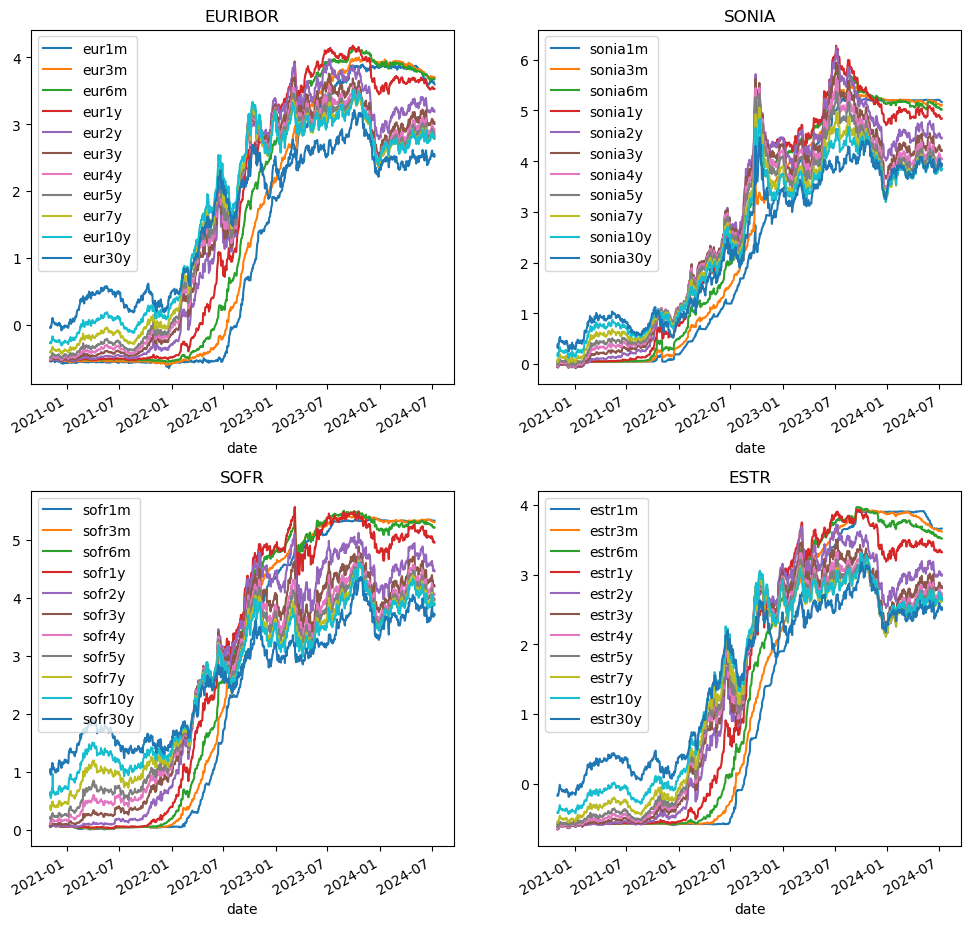

In [3]:
sonia = market_quotes[sonia_tenors]
estr = market_quotes[estr_tenors]
sofr = market_quotes[sofr_tenors]
euribor = market_quotes[euribor_tenors]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = [12, 12])

plt.subplots_adjust(hspace = 0.3)

euribor.plot(ax=axes[0,0], title = 'EURIBOR', rot = 30)
sonia.plot(ax=axes[0,1], title = 'SONIA')
sofr.plot(ax=axes[1,0], title = 'SOFR')
estr.plot(ax=axes[1,1], title = 'ESTR')

Through observing the Data, the rates quoted can be assumed to be Yields that are constructed from various underlying instruments such as Money-Market, Swap Rates, and Futures. 

C:\Users\Chauv\AppData\Local\Temp\ipykernel_37436\1107097708.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


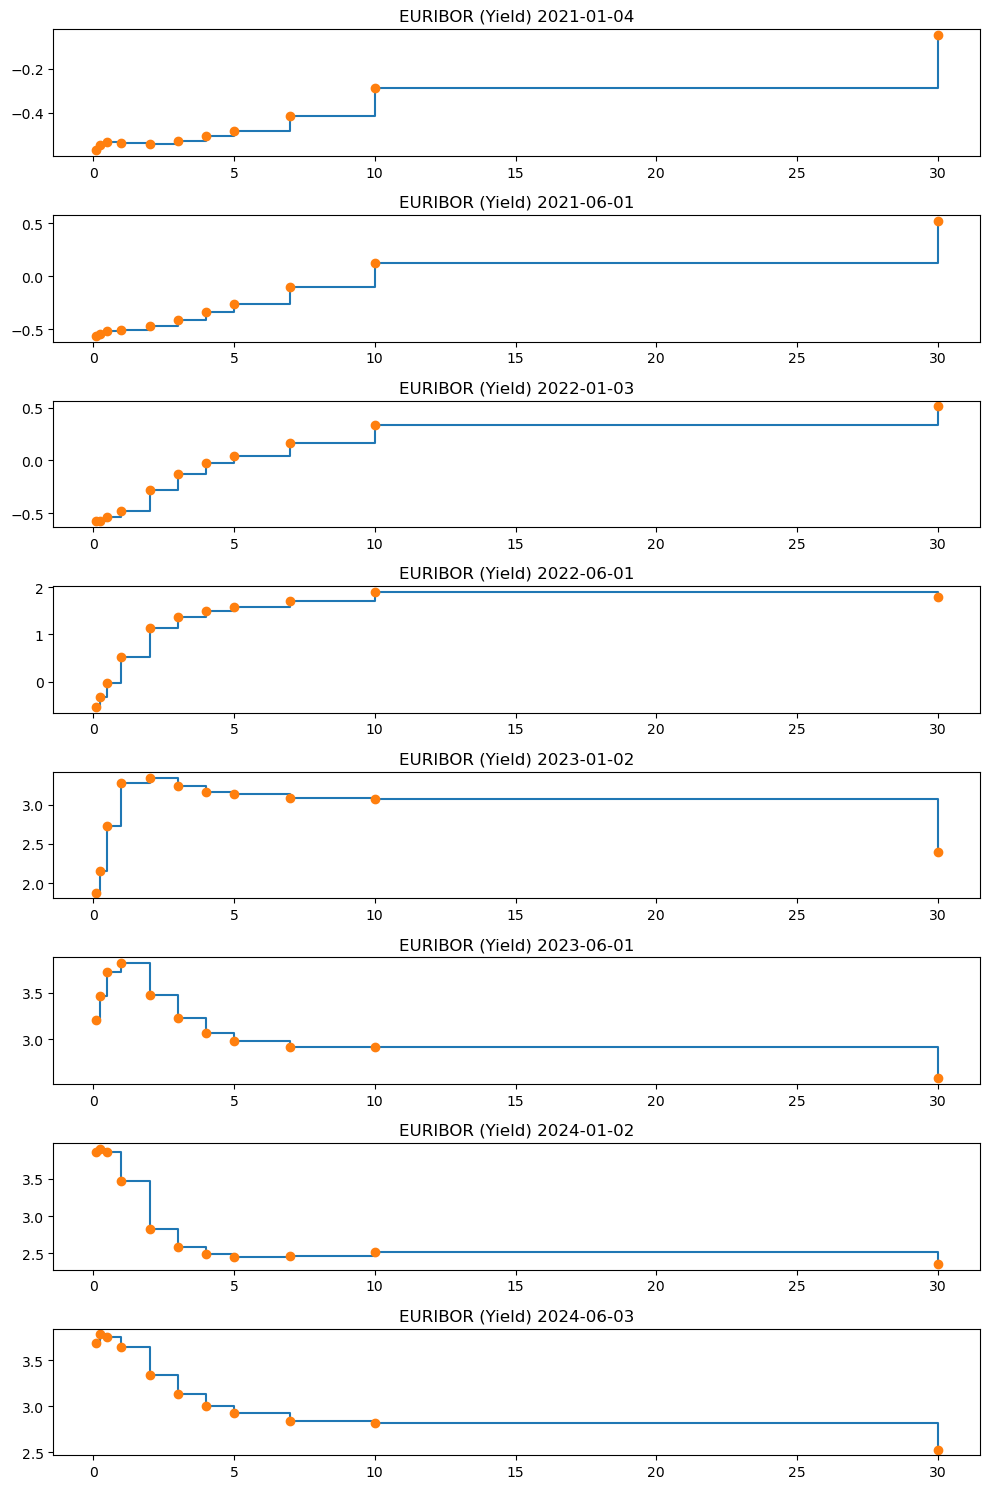

In [6]:
spot_t0 = ['2021-01-04', '2021-06-01', '2022-01-03', '2022-06-01',
           '2023-01-02', '2023-06-01', '2024-01-02', '2024-06-03']
           
df = euribor.loc[spot_t0]

eur_rates = df.to_numpy()
        
tenor = [30/360, 0.25, 0.5, 1, 2, 3, 4, 5, 7, 10, 30]

fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize = [10,15])
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration


for i in range(8):
    #where = 'post' for forward looking IBOR
    #where = 'pre' for backward looking Overnight RFRs
    axes[i].step(tenor, eur_rates[i], where = 'post') 
    axes[i].plot(tenor, eur_rates[i], 'o')
    axes[i].set_title(f'EURIBOR (Yield) {spot_t0[i]}')

fig.tight_layout()
fig.show()

C:\Users\Chauv\AppData\Local\Temp\ipykernel_37436\3748616392.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


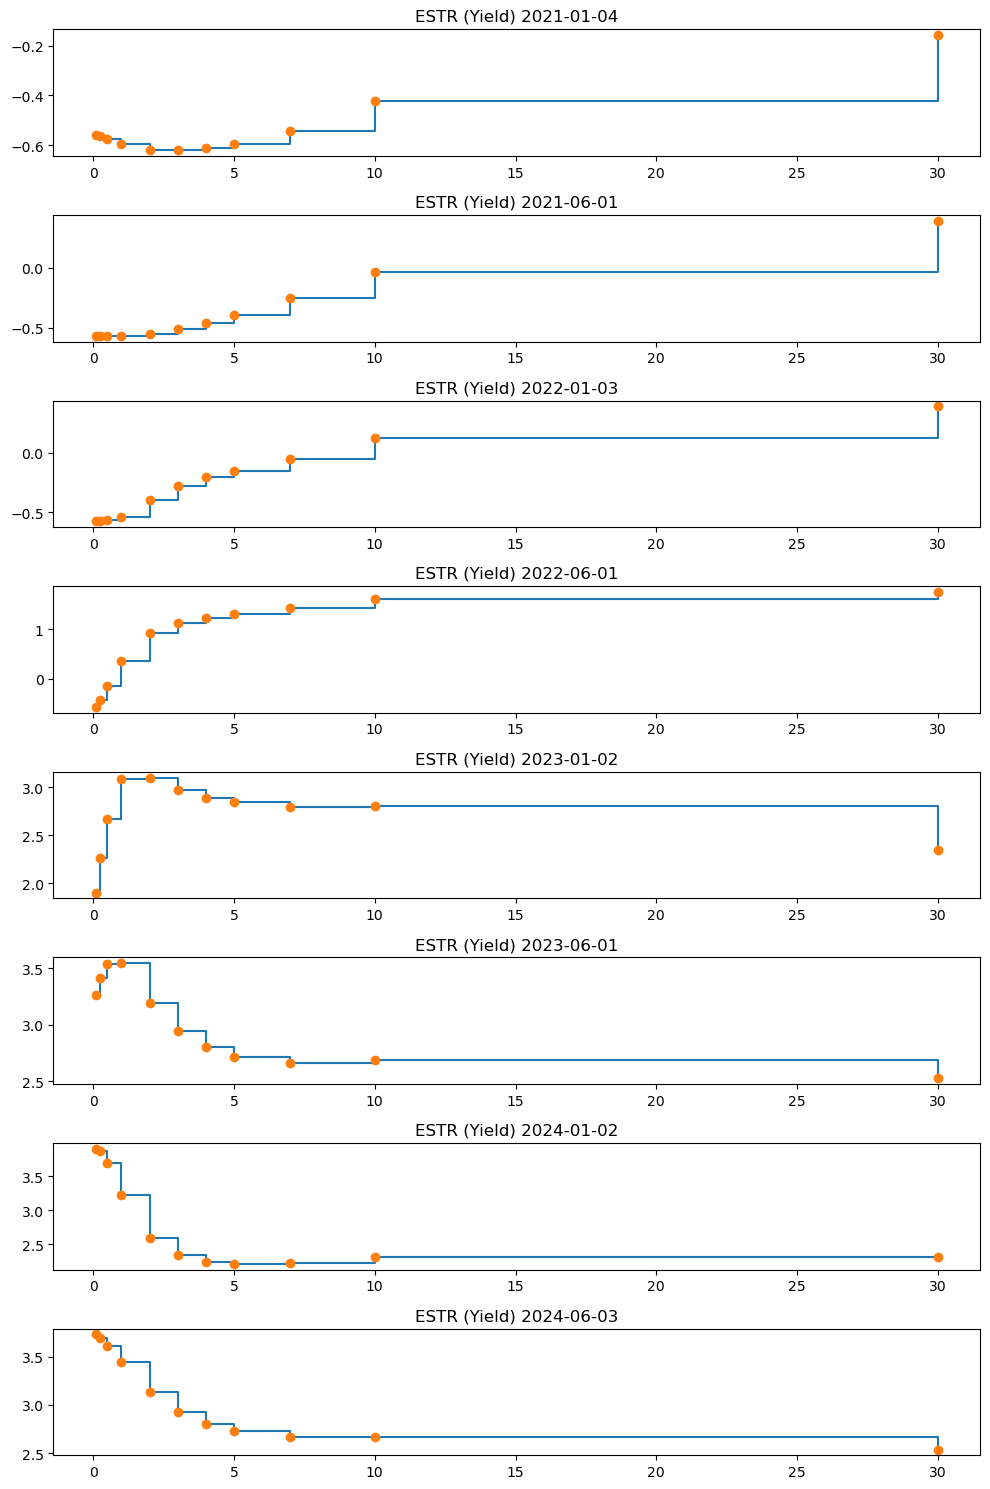

In [8]:
df = estr.loc[spot_t0]

eur_rates = df.to_numpy()
        
tenor = [30/360, 0.25, 0.5, 1, 2, 3, 4, 5, 7, 10, 30]

fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize = [10,15])
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration


for i in range(8):
    #where = 'post' for forward looking IBOR
    #where = 'pre' for backward looking Overnight RFRs
    axes[i].step(tenor, eur_rates[i], where = 'post') 
    axes[i].plot(tenor, eur_rates[i], 'o')
    axes[i].set_title(f'ESTR (Yield) {spot_t0[i]}')

fig.tight_layout()
fig.show()

Inverted Yield Curve for EUR rates. Non-monotonic at the shorter end. 

C:\Users\Chauv\AppData\Local\Temp\ipykernel_37436\2920731205.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


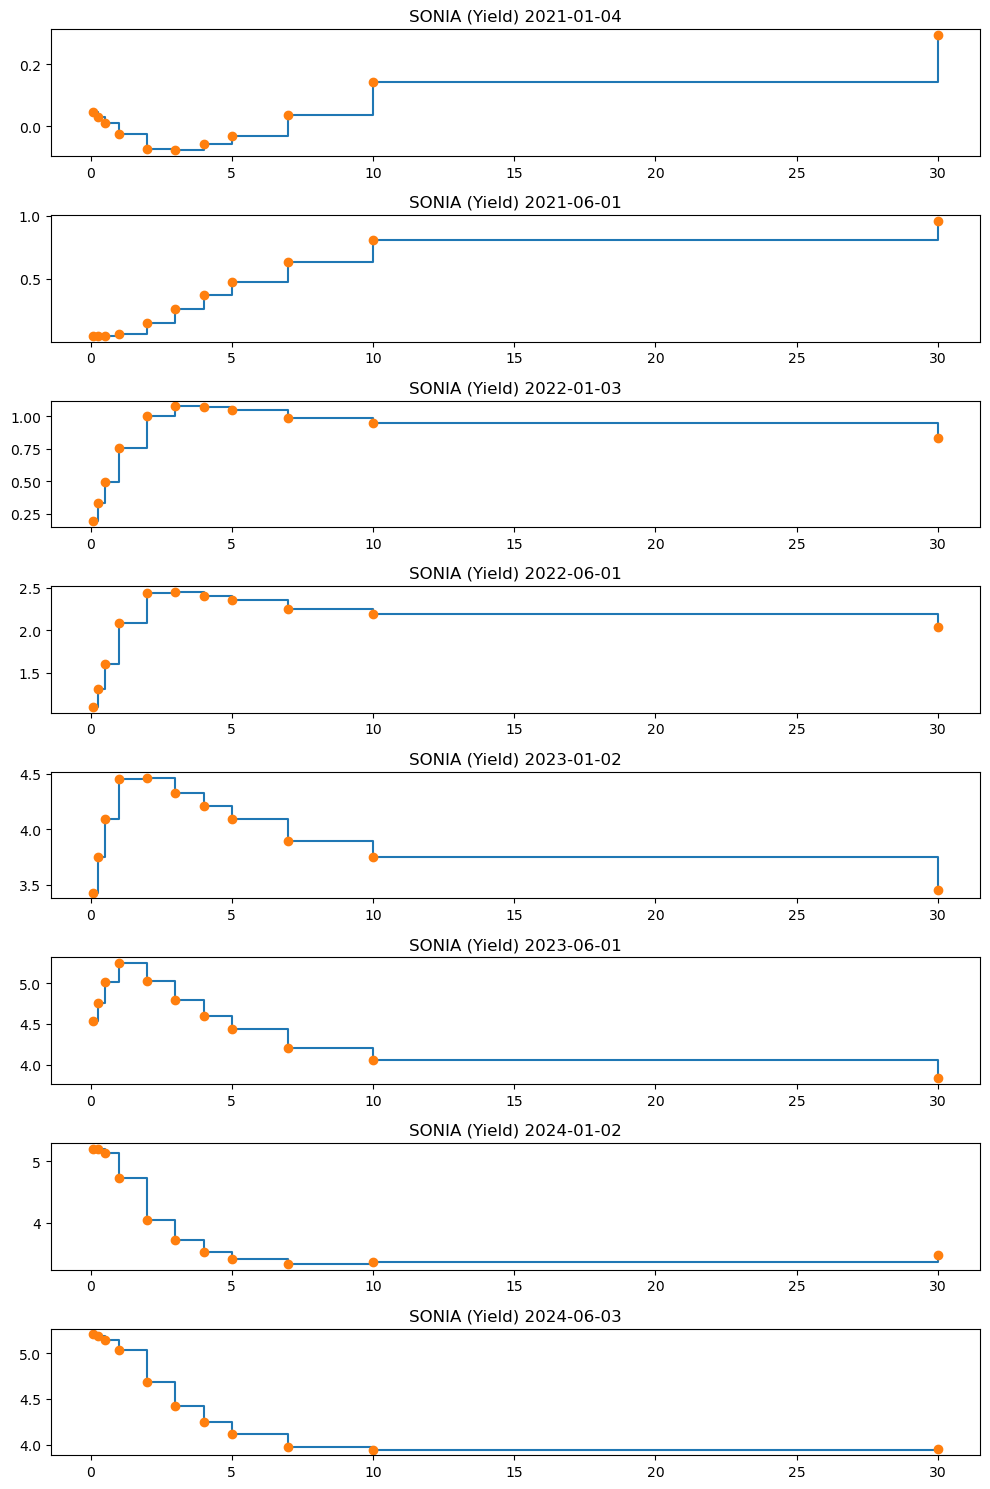

In [10]:
df = sonia.loc[spot_t0]

gbp_rates = df.to_numpy()
        
tenor = [30/360, 0.25, 0.5, 1, 2, 3, 4, 5, 7, 10, 30]

fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize = [10,15])
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration


for i in range(8):
    #where = 'post' for forward looking IBOR
    #where = 'pre' for backward looking Overnight RFRs
    axes[i].step(tenor, gbp_rates[i], where = 'post') 
    axes[i].plot(tenor, gbp_rates[i], 'o')
    axes[i].set_title(f'SONIA (Yield) {spot_t0[i]}')

fig.tight_layout()
fig.show()

C:\Users\Chauv\AppData\Local\Temp\ipykernel_37436\3656417014.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


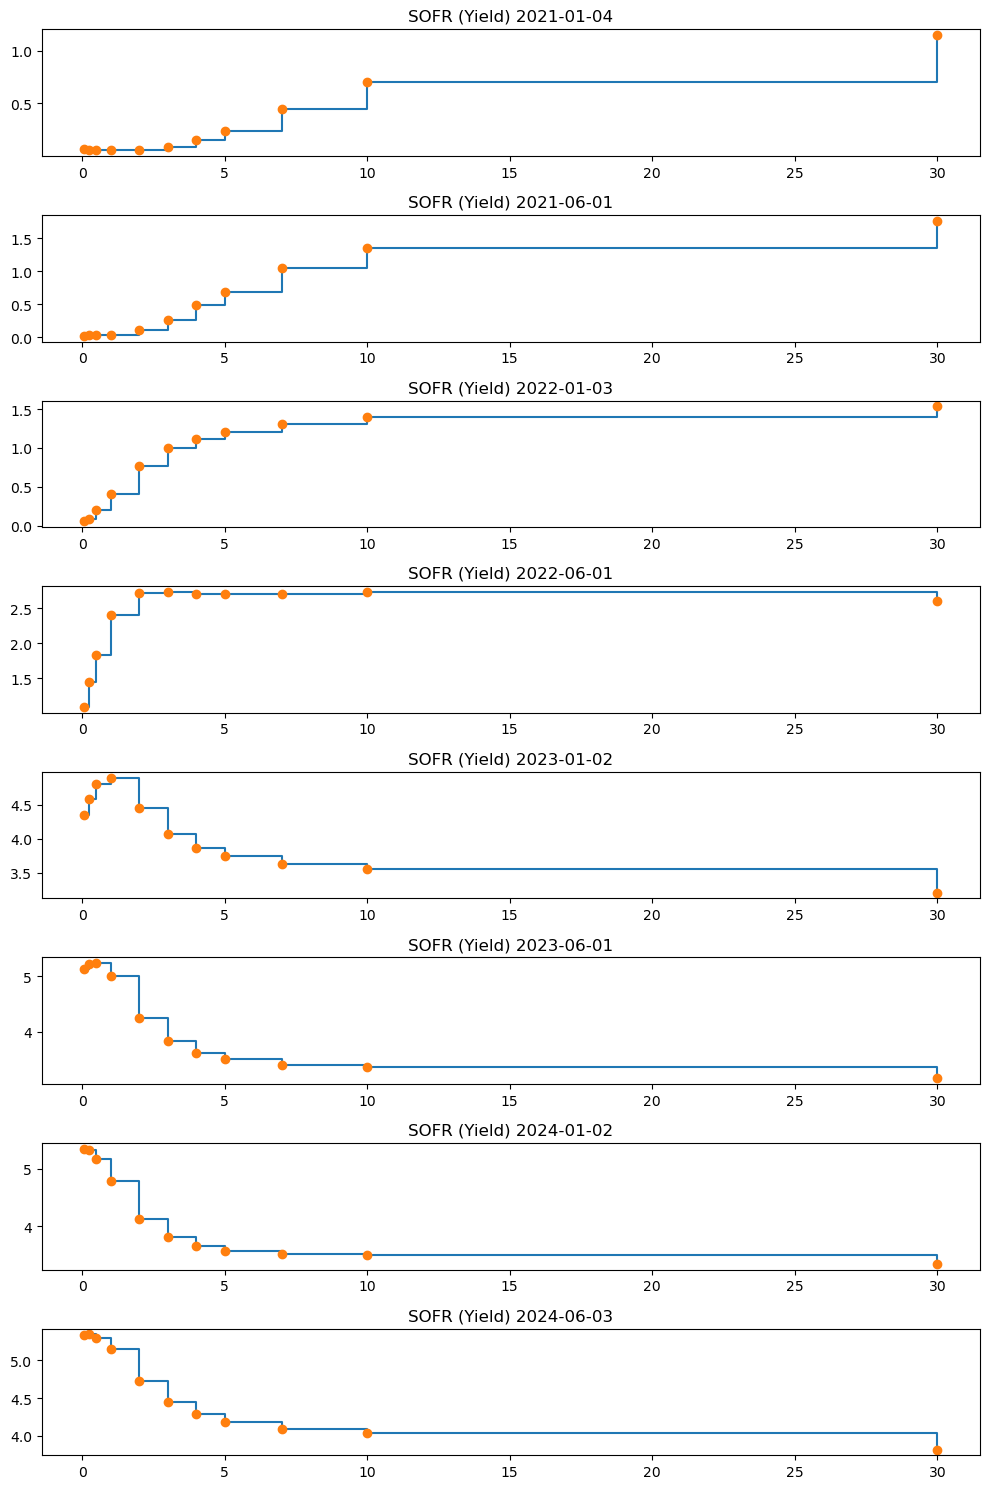

In [12]:
df = sofr.loc[spot_t0]

usd_rates = df.to_numpy()
        
tenor = [30/360, 0.25, 0.5, 1, 2, 3, 4, 5, 7, 10, 30]

fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize = [10,15])
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration


for i in range(8):
    #where = 'post' for forward looking IBOR
    #where = 'pre' for backward looking Overnight RFRs
    axes[i].step(tenor, usd_rates[i], where = 'post') 
    axes[i].plot(tenor, usd_rates[i], 'o')
    axes[i].set_title(f'SOFR (Yield) {spot_t0[i]}')

fig.tight_layout()
fig.show()

### PCA EURIBOR

Daily changes $\Delta t = \dfrac{1}{360}$ of Yield Curve $\mathbf{x_i}(t) = y(t + \Delta t, \; t + \Delta t + \tau_i) - y(t, \; t + \tau_i)$

EURIBOR for $n = 11$ time-to-maturities $\tau_i = 1m, \; 3m, \; 6m, \; 1y, \; 2y, \; 3y, \; 4y, \; 5y, \; 7y, \; 10y, \; 30y$

In [15]:
euribor = euribor.dropna(axis=0)
scm = euribor.cov()
D, Q = np.linalg.eig(scm)
Q = -Q
print(f'Contribution to Variation of Returns-data from largest Principal Component is {D[0] / np.sum(D)}')
print(f'Contribution to Variation of Returns-data from 2nd Principal Component is {D[1] / np.sum(D)}')
print(f'Contribution to Variation of Returns-data from 3rd Principal Component is {D[2] / np.sum(D)}')
print(scm.shape)

Contribution to Variation of Returns-data from largest Principal Component is 0.9571159478840494
Contribution to Variation of Returns-data from 2nd Principal Component is 0.04061285154623205
Contribution to Variation of Returns-data from 3rd Principal Component is 0.001617214256939628
(11, 11)


The first 3 Principal Components explain 0.999346013687221 of the Variance


Text(0.5, 1.0, 'EURIBOR SCM')

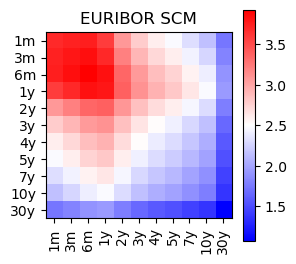

In [16]:
print(f'The first 3 Principal Components explain {(D[0] + D[1] + D[2]) / np.sum(D)} of the Variance')

import matplotlib.colors as mcolors

f = plt.figure(figsize=(3, 3))
plt.ion()
plt.set_cmap('bwr')

c_max = scm.to_numpy().max()
c_min = scm.to_numpy().min()
norm = mcolors.TwoSlopeNorm(vmin = c_min, vcenter = (c_max + c_min) / 2, vmax = c_max)
before = plt.imshow(scm, interpolation = "none", norm = norm)
plt.xticks(ticks=np.arange(11), 
           labels=['1m', '3m', '6m', '1y', '2y', '3y', '4y', '5y', '7y', '10y', '30y'], 
           rotation=90, fontsize = 10)
plt.yticks(ticks=np.arange(11), 
           labels=['1m', '3m', '6m', '1y', '2y', '3y', '4y', '5y', '7y', '10y', '30y'], 
           rotation=0, fontsize = 10)
cbar = f.colorbar(before)
plt.title("EURIBOR SCM")

The first 3 Principal Components explain 0.999346013687221 of the Variance


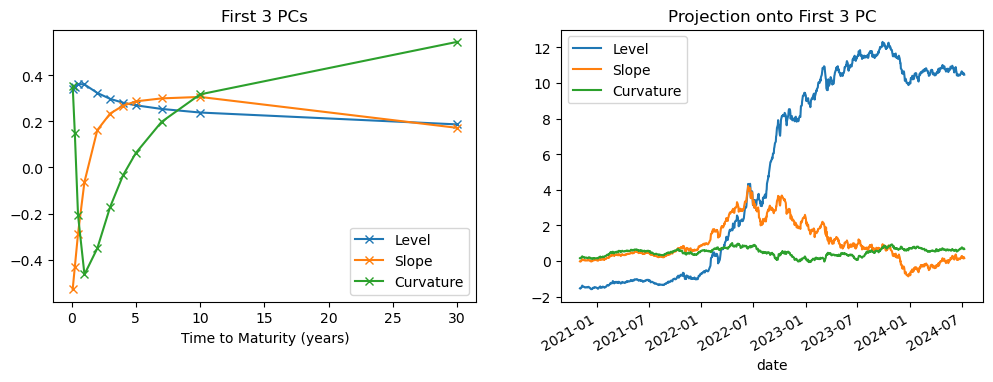

In [17]:
print(f'The first 3 Principal Components explain {(D[0] + D[1] + D[2]) / np.sum(D)} of the Variance')

label = ['Level', 'Slope', 'Curvature']

tenors = [1 / 12, 0.25, 0.5, 1, 2, 3, 4, 5, 7, 10, 30]

fig = plt.figure(figsize = [12,4])
ax1 = fig.add_subplot(121)
ax1.plot(tenors, Q[:, :3], 'x-')
plt.xlabel('Time to Maturity (years)')
ax1.legend(label, loc = 'best')
plt.title('First 3 PCs')

#Projecting onto first 3 PC
z = euribor.dot(Q).iloc[:, :3]

ax2 = fig.add_subplot(122)
z.plot(ax = ax2, title = 'Projection onto First 3 PC')
ax2.legend(label, loc = 'best')


### PCA of Yield Curve, SOFR

Contribution to Variation of Returns-data from largest Principal Component is 0.9774786287534235
Contribution to Variation of Returns-data from 2nd Principal Component is 0.018683515006057694
Contribution to Variation of Returns-data from 3rd Principal Component is 0.003278232143779328
(11, 11)


Text(0.5, 1.0, 'SOFR SCM')

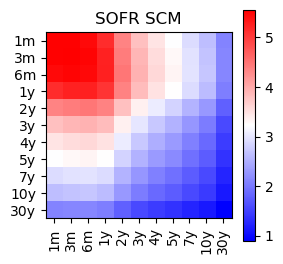

In [18]:
sofr = sofr.dropna(axis=0)
#scm = X.cov()
scm = sofr.cov()
D, Q = np.linalg.eig(scm)
print(f'Contribution to Variation of Returns-data from largest Principal Component is {D[0] / np.sum(D)}')
print(f'Contribution to Variation of Returns-data from 2nd Principal Component is {D[1] / np.sum(D)}')
print(f'Contribution to Variation of Returns-data from 3rd Principal Component is {D[2] / np.sum(D)}')
print(scm.shape)

f = plt.figure(figsize=(3, 3))
plt.ion()
plt.set_cmap('bwr')

c_max = scm.to_numpy().max()
c_min = scm.to_numpy().min()
norm = mcolors.TwoSlopeNorm(vmin = c_min, vcenter = (c_max + c_min) / 2, vmax = c_max)
before = plt.imshow(scm, interpolation="none", norm = norm)
plt.xticks(ticks=np.arange(11), 
           labels=['1m', '3m', '6m', '1y', '2y', '3y', '4y', '5y', '7y', '10y', '30y'], 
           rotation=90, fontsize = 10)
plt.yticks(ticks=np.arange(11), 
           labels=['1m', '3m', '6m', '1y', '2y', '3y', '4y', '5y', '7y', '10y', '30y'], 
           rotation=0, fontsize = 10)
cbar = f.colorbar(before)
plt.title("SOFR SCM")

The first 3 Principal Components explain 0.9994403759032605 of the Variance


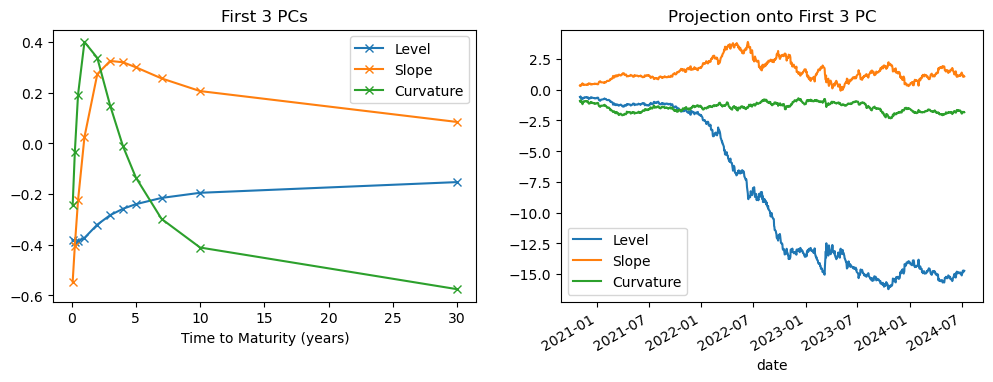

In [19]:
print(f'The first 3 Principal Components explain {(D[0] + D[1] + D[2]) / np.sum(D)} of the Variance')

label = ['Level', 'Slope', 'Curvature']

tenors = [1 / 12, 0.25, 0.5, 1, 2, 3, 4, 5, 7, 10, 30]

fig = plt.figure(figsize = [12,4])
ax1 = fig.add_subplot(121)
ax1.plot(tenors, Q[:, :3], 'x-')
plt.xlabel('Time to Maturity (years)')
ax1.legend(label, loc = 'best')
plt.title('First 3 PCs')

#Projecting onto first 3 PC
z = sofr.dot(Q).iloc[:, :3]

ax2 = fig.add_subplot(122)
z.plot(ax = ax2, title = 'Projection onto First 3 PC')
ax2.legend(label, loc = 'best')
